## Predictive Data Analysis and Option Pricing for Financial Instruments
###### Author: E.Delali Aggor

### Introduction
The Black-Scholes model, also known as the Black-Scholes-Merton (with dividend) model, is a mathematical model used for estimating the prices of an option contract based on other investment instruments, taking into account the impact of time and other risk factors. It is regarded as the best method for estimating option prices. 

An option contract enables its owner to buy or sell an underlying asset at a price, also known as strike price. The owner of the option contract may buy or sell the asset at the given price, but he may also decide not to do it if the asset’s price isn’t advantageous.

There are two types of options : A Call option (the holder has the right to buy an asset at an agreed strike price)  put option (he holder has the right to sell an asset at an agreed strike price).

In addition, there are also two different ways options are exercised: 

- European options and American Options. European options can be exercised only at expiration or maturity 
- American options can be exercised at any time or during the entire lifetime of the option, hence more valuable. 

- NB: Options considered in this work can only be exercised at expiration, hence are European options.


### Input Variables
The Black-Scholes model requires five input variables: the strike price of an option, the current stock price, the time to expiration, the risk-free rate, and the volatility.

- $S_0$     - Current price/spot price of the underlying or Asset / The stock’s current market price
- $X$     - The strike price at which the option can be exercised; if we exercise the option, we can buy the stock at the strike price X
- $r$           - Riskless rate of interest
- $σ/stdev$     - Volatility. That is, the standard deviation of the underlying asset
- $T$           - Term of the option

### Formula 
 Below are the Call and Put options for the Black-Scholes model under consideration. 
 
call option price:
$C = S_0N(d_1) - Xe^{-rT}N(d_2)$
     
put option price: 
$P = Xe^{-rT}N(-d_2) - S_0N(-d_1)$

with,

$$
d_1 = \frac{\ln \left(\frac{S_0}{X}\right) + \left(r + \frac{stdev^2}{2}\right)T}{stdev \cdot \sqrt{T}}
$$

$$
d_2 = d_1 - stdev \cdot \sqrt{T} = \frac{\ln \left(\frac{S_0}{X}\right) + \left(r - \frac{stdev^2}{2}\right)T}{stdev \cdot \sqrt{T}}
$$

where,

- ln = natural logarithm
- e = basis of the natural logarithm = 2.7128. . .
- N(d) = cumulative standard normal distribution

Therefore, the valuation of an option at time T = 0 (c or p) is thus influenced by the current share price $S_0$, the exercise price X, the term of the option T, the riskless rate of interest r as well as two weights N(d). 


### Note - CDF:
- The cumulative distribution shows how the data accumulates in time, its output can never be below zero or above one.
- So Norm CDF will take as an argument a value from the data and will show us what portion of the data lies below that value. 


### PART 1: Exploratory Data Analysis
- Historical data was obtained from yahoo finance.

- The data extrated is a time series data for each trading day from 2017-01-01 to 2021-12-31.

- The data has 1267 rows and 6 columns. All columns have 255 non-null values (no missing value).




- The following lines of code imports the required libraries: NumPy for numerical operations, Pandas for data manipulation, scikit-learn for machine learning, Matplotlib and Seaborn for plotting.

In [1]:
#import required packages

import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
import seaborn as sns
sns.set()

# set plotting parameters
%matplotlib inline
#sns.set_style("whitegrid")
plt.rc("figure", figsize=(12, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

###### From the data below: 
- The adjusted closing price for the first few years is smaller compared to the closing price as in the table above. The difference is due to dividends paid to stock owners as well as other changes in stock price such as stock splits, increase in capital etc. 

- The date column only include trading days. That is to say that, the date column excludes Saturdays, Sundays and National Holidays as stock markets are not opened on such days.  

- It is worth nothing that, the first two rows (column descrictions) are not counted as part of the rows with data. The first row is the row with data with a date of "2017-01-02". Row one is the next row and so on.

In [2]:
# Define the ticker symbol and date range
ticker = "BAS.DE"
start = '2017-01-01'
end = '2021-12-31'

# Download the historical stock prices
data_BASF = yf.download(ticker, start=start, end=end)


# Create a new DataFrame
BASF_data = pd.DataFrame(data_BASF)
BASF_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,87.500000,88.809998,87.099998,88.699997,56.960785,1245318
2017-01-03,88.879997,88.879997,87.419998,87.699997,56.318607,2806564
2017-01-04,87.889999,88.150002,87.269997,88.150002,56.607590,1955701
2017-01-05,87.540001,88.250000,87.389999,87.790001,56.376408,1753933
2017-01-06,87.500000,87.730003,87.269997,87.519997,56.203014,1518979
...,...,...,...,...,...,...
2021-12-23,60.180000,60.939999,60.180000,60.830002,52.708607,1889040
2021-12-27,60.650002,61.500000,60.500000,61.290001,53.107193,1405892
2021-12-28,61.299999,61.930000,61.259998,61.700001,53.462452,1576927


In [3]:
#General inforamtion about the data : This includes the row index, column names and the number of non-zero values.

BASF_data.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1267 entries, 2017-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1267 non-null   float64
 1   High       1267 non-null   float64
 2   Low        1267 non-null   float64
 3   Close      1267 non-null   float64
 4   Adj Close  1267 non-null   float64
 5   Volume     1267 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.3 KB


###### Visualizing Daily Returns: 
- First, we extract the column needed for estimating the Call and Put option prices. This is the Adjusted Closing Price.
- The stock's closing price is modified by the adjusted closing price to reflect the stock's worth following any corporate actions such as dividends paid to stock owners and other changes such to stock price such as stock splits etc. 
- When analyzing historical returns or performing a thorough analysis of past performance, it is frequently used.

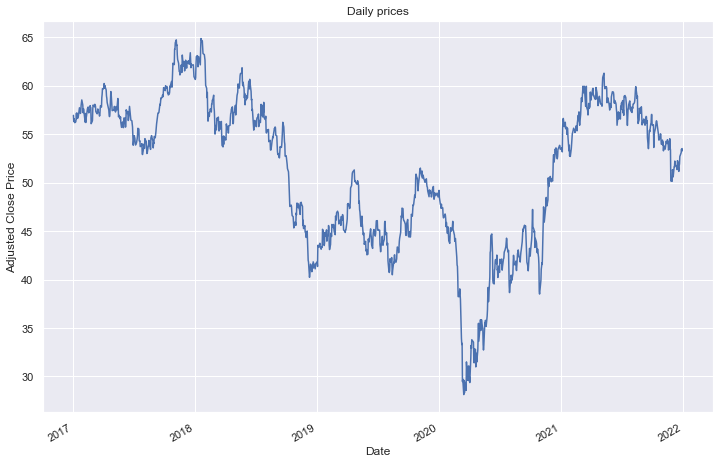

In [4]:
BASF = BASF_data['Adj Close']
BASF.head()

BASF.plot()
plt.title('Daily prices')
plt.ylabel('Adjusted Close Price')
plt.show()

###### Calculating and visualizing daily Log Returns
- Log returns : Instead of simple rates of return, we calculate logarithmic rates of return, also called log returns. 
- The log returns formula is given by:
$$
ln(\frac{P_t}{P_{t-1}})
$$
-As we can see from the graph below, our time series has a stable trend and now they are moving around zero. The sharpe of the distribution is clearly seen. This further implies that our log return's data is normally distributed and have a stable mean. We can conclude then that, our time series are now closer to stationarity and can used them for our analysis.

Text(8.120000000000005, 0.5, 'Frequency')

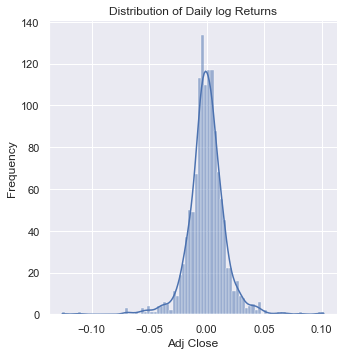

In [5]:
log_returns = np.log(1 + BASF.pct_change()) 

sns.displot(log_returns, kde=True)
plt.title("Distribution of Daily log Returns")
plt.ylabel("Frequency")

### PART 2: Predictive Modeling of Stock Prices using Linear Regression

- A predictive modeling approach is used to forecast future prices of the stock data using a linear regression. 
- Leveraging historical data, the scikit-learn library was utilized to implement a linear regression model, taking into account the adjusted closing prices as features. 
- The model was trained on a subset of the data, and its performance was evaluated using metrics such as Mean Squared Error and R^2. 
- The resulting predictions were visually compared to actual values, providing insights into the efficacy of the linear regression model in capturing patterns within the stock's historical price movements. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

###### Feature and Target Selection: 
- the adjusted closing price is extracted as the feature (X) and reshaped it into a 2D array

- next, a target variable (y) is created. This is done by shifting the adjusted closing prices by one day. This is done to predict tomorrow's closing price. The dropna() removes the last row, as there is no corresponding value for the shifted day.

In [7]:
# Feature: Historical adjusted closing prices
X = BASF_data['Adj Close'].values.reshape(-1, 1)

# Target: Adjusted closing prices shifted by 1 day (predicting tomorrow's closing price)
y = BASF_data['Adj Close'].shift(-1).dropna().values

###### Training and Test data set
- scikit-learn's train_test_split function is used to split the data into training and testing sets. 
- The test_size parameter specifies the proportion of the dataset to include in the test split, and random_state ensures reproducibility.

In [8]:
# Split the data into training and testing sets
X_temp = X[:-1]  # Exclude the last row
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=test_size, random_state=random_state)

###### Linear Regression Model
- A linear regression model is created using scikit-learn's LinearRegression class, and it's trained on the training set.

In [9]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Access model parameters
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for the intercept and coefficients
model_results = pd.DataFrame({
    'Intercept': [intercept],
    'Coefficient': coefficients
})


# Print or display the DataFrame
model_results

,Intercept,Coefficient
0,0.366692,0.992984


In [10]:
y = intercept + coefficients * X

###### Making Predictions and Visulaizing the Outcome:
- The first block of code is used to train model to make predictions on the test set.

- A scatter plot is then created to visualize the actual vs. predicted values on the test set. 

- The x-axis represents the actual adjusted closing prices, and the y-axis represents the predicted values for the next day's adjusted closing prices.

In [11]:
# Make predictions on the test set
predicted_stock_prices = model.predict(X_test)

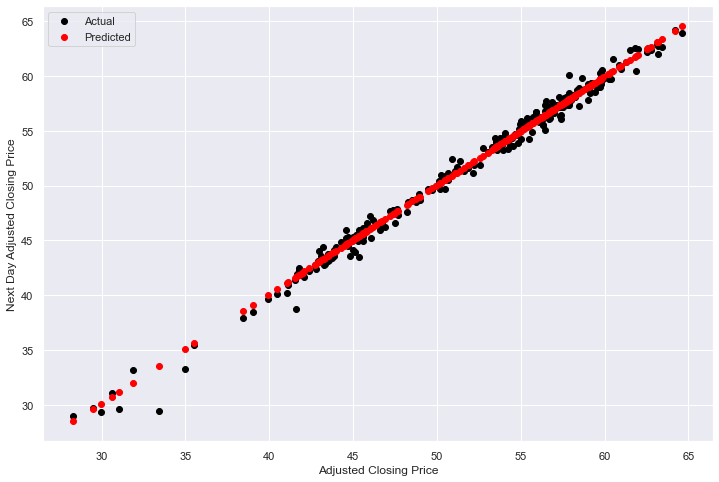

In [12]:
# Visualize the predictions
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predicted_stock_prices, color='red', label='Predicted')
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Next Day Adjusted Closing Price')
plt.legend()
plt.show()

### Model Evaluation

- These block calculates the Mean Squared Error (MSE) between the actual and predicted values on the test set, providing a measure of how well the model performs.

- The R-squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variable. It ranges from 0 to 1, where 1 indicates a perfect fit.

In [13]:
# Evaluate the model performance
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, predicted_stock_prices)
r2 = r2_score(y_test, predicted_stock_prices)

# Create a DataFrame for the results
evaluation_results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared Score'],
    'Value': [mse, r2]
})

# Print or display the DataFrame
evaluation_results

,Metric,Value
0,Mean Squared Error,0.461434
1,R-squared Score,0.991805


### Discussion

The linear regression model trained on the historical adjusted closing prices for BASF stock has demonstrated strong predictive performance. The evaluation metrics further affirm the model's effectiveness in capturing the underlying patterns in the data.

The Mean Squared Error (MSE), a measure of the average squared difference between actual and predicted values, is found to be of 0.461434: This reflects a relatively low level of prediction error, suggesting that the model's predicted values are close to the actual values on average.

Additionally, the R-squared score, a measure of the proportion of variance explained by the model, is exceptionally high at 0.992 signifying an exceptional fit of the model to the data, explaining approximately 99.18% of the variability in the target variable.

## PART 3: Using Predicted Stock Prices to Estimate Option Prices

- We define the following functions for d1,d2, call price and put price. For coding seek let $S_0=S$
-  we then create a variable S, which is equal to the last adjusted closing price of BASF. We use the “iloc” method. This method will deliver the current stock price.

In [14]:
def d1(S, X, r, stdev, T):
    return (np.log(S / X) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, X, r, stdev, T):
    return (np.log(S / X) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM_call(S, X, r, stdev, T):
        return (S * norm.cdf(d1(S, X, r, stdev, T))) - (X * np.exp(-r * T) * norm.cdf(d2(S, X, r, stdev, T)))
    
def BSM_put(S, X, r, stdev, T):
        return ((X * np.exp(-r * T) * norm.cdf(-d2(S, X, r, stdev, T))) - S * norm.cdf(-d1(S, X, r, stdev, T)))

###### Parameters: Black-Scholes Model
- The last predicted stock price is assumed to be the current stock price (S_predicted). 
- This value will be used as the current stock price in the Black-Scholes Model.


- The standard deviation of the predicted stock returns is calculated. 
- This is needed for the volatility parameter in the Black-Scholes Model.


- The remaining parameters for the Black-Scholes Model: risk-free rate (r), option strike price (X_option), and time to expiration in years (T_option). 
- The risk-free rate of 2.494% (approxiamtely 2.5%) corresponding to a 10 year German government bond.


- We calculate the values of d1 and d2, which are required for option pricing in the Black-Scholes Model.

In [15]:
# Use the predicted stock prices as input for the Black-Scholes Model
S_predicted = predicted_stock_prices[-1]  # Assuming the last predicted price is the current price

# Calculate the standard deviation for the predicted stock returns
stdev_predicted = np.std(predicted_stock_prices) * 250 ** 0.5

# Set other Black-Scholes Model parameters
r = 0.025
X_option = 48
T_option = 1

# Calculate d1 and d2 for option pricing
d1_option = d1(S_predicted, X_option, r, stdev_predicted, T_option)
d2_option = d2(S_predicted, X_option, r, stdev_predicted, T_option)

###### Estimate option prices
- The Black-Scholes Model functions BSM_call and BSM_put is used to estimate the call and put option prices based on the predicted stock prices and other parameters.

In [16]:
# Use the Black-Scholes Model to estimate option prices
call_price_option = BSM_call(S_predicted, X_option, r, stdev_predicted, T_option)
put_price_option = BSM_put(S_predicted, X_option, r, stdev_predicted, T_option)


# Create a DataFrame for the estimated option prices
option_prices = pd.DataFrame({
    'Option Type': ['Call', 'Put'],
    'Estimated Price': [call_price_option,put_price_option]
})
option_prices

,Option Type,Estimated Price
0,Call,62.523469
1,Put,46.814876


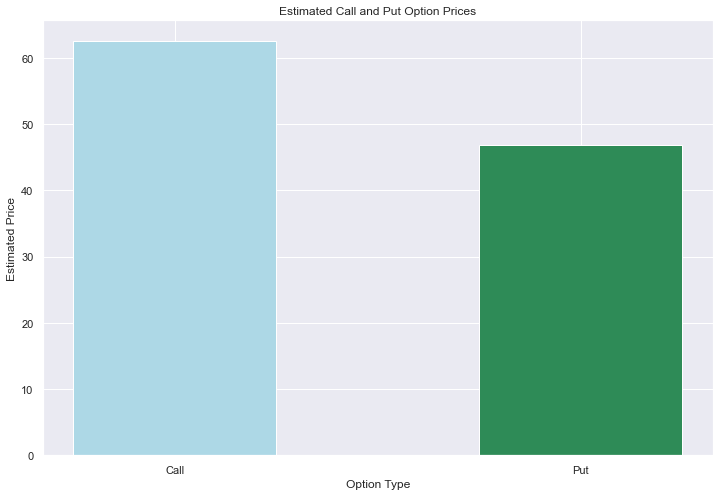

In [17]:
# Plotting the estimated option prices with custom colors and bar size
plt.bar(option_prices['Option Type'], option_prices['Estimated Price'], color=['lightblue', 'seagreen'], width=0.5)
plt.xlabel('Option Type')
plt.ylabel('Estimated Price')
plt.title('Estimated Call and Put Option Prices')
plt.show()

Conclusion:

1. **Estimated Call Price using Predicted Stock Prices: 62.52**
   - The estimated call option price represents the model's prediction for the cost of buying the option to purchase BASF stock at the specified strike price. In this case, the predicted call option price is approximately 62.52.

2. **Estimated Put Price using Predicted Stock Prices: 46.81**
   - The estimated put option price indicates the model's prediction for the cost of buying the option to sell BASF stock at the specified strike price. Here, the predicted put option price is around 46.81.

In summary, these estimated option prices provide insights into the model's predictions regarding the potential future movements of BASF stock. Investors and analysts can use these values to make informed decisions about option trading based on the model's outlook. These estimates rely on the predicted stock prices from the linear regression model and the assumptions of the Black-Scholes Model. Actual market conditions and events may influence option prices differently.